# Universal Basic Income 
## Design a Tax Code that Works

This workbook advocates that Universal Basic Income plus a flat income tax implements a scheme that is overall a near-optimal progressive taxation scheme, which is much fairer to families with two working spouses, which reduces income inequality with attendant potential reductions in violent crime and dramatically lower complexity.

The workbook shows the mathematics of how this kind of taxation works, allows you to compare the scheme to optimal schemes with your favorite set of preferences, and lets you estimate the financial situation of a number of different examples families to understand the advantages.

In [43]:
using Pkg
Pkg.activate(".")

using DataFrames, DataFramesMeta, StatsPlots, Distributions, ApproxFun, Optimization, Printf

  Activating project at `~/Consulting/LakelandAppliedSciLLC/UBINotebook`


## What is UBI?

Universal Basic Income is money given to each and every citizen monthly as an "income floor", it is intended as a form of pure redistribution of income which can be thought of in a number of ways:

1) UBI compensates people for inevitable public goods they provide, where they are otherwise unpaid. Examples include childcare, local community volunteer efforts, labor spent on maintenance of their home, car, community resources, children's sports teams, helping people on public online forums, playing live music, teaching, and soforth.

2) UBI reduces poverty which dramatically reduces incentives to commit crimes like property theft, vandalism, muggings. 

3) UBI decreases income inequality, while income inequality is one of the most robust predictors of violent crime across all countries in the world.

4) UBI simplifies the complexity of a taxation system designed to help poor people.

5) UBI reduces labor market inefficiency, replaces the need for minimum wage, providing workers with greater bargaining power, enhances opportunities for entrepreneurship, and alleviates housing insecurity and homelessness.

6) UBI can replace many extraordinarily inefficient "means tested" welfare systems which are both much less effective at treating poverty, and often create wasteful bureaucracy and even trap people into permanent poverty from which they can't escape.

The point of UBI is not just that it helps the poor, but that it makes society function better, reduces many societal ills such as homelessness and people trapped in poverty, childhood poverty, and soforth. Even the upper middle class families that ultimately wind up being the source of funds receive benefits from these payments in the form of lower crime, lower homelessness, lower childhood poverty, a more productive workforce, lower incidence of serious illness, greater fairness and reduced complexity when it comes to compliance with tax law. 

Let's see how UBI works. 

## Take Home Pay, a means of comparison

Take a look at the graph below. It shows a space in which we can discuss current 2023 take home pay as a function of earned income. It has a simple line y = x for visual comparison. This line is what each person would take home if there were no taxes at all. This is just a reference point for our comparison:


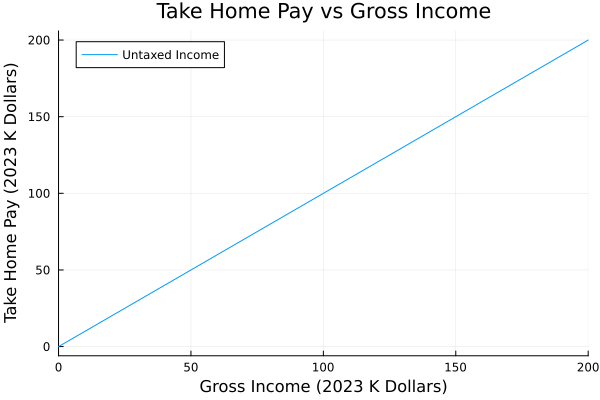

In [10]:
const uspop = 336e6 # as of 2023


function plotthinc()
    p = plot(x -> x; title="Take Home Pay vs Gross Income",xlab="Gross Income (2023 K Dollars)",ylab="Take Home Pay (2023 K Dollars)",legend=true,label="Untaxed Income",xlim=(0,200))
end


plotthinc()

## How flat tax plus UBI works

Our government needs some money to run, we can all argue for our favorite level of government funding, but as of recently, according to information [available at Wikipedia](https://en.wikipedia.org/wiki/United_States_federal_budget) based on official government data, the 2022 Federal spending was $6.3 Trillion and Federal total revenues is $4.9 Trillion. 

It's useful to think about those numbers in terms of a fraction of GDP. Historically revenue has been on average about 17.4% of GDP and spending has been on average 21% of GDP. Let's argue later about how to adjust federal **spending**, instead we will simply add to all of this a Federal **transfer** which purely collects money from everyone according to the tax code, and returns it to the people in the form of a fixed monthly payment to everyone... that is the UBI.

It should be noted that this is not a form of "spending" per se. No scarce resources are consumed by this activity, the way they are when the government uses asphalt and labor to make roads or concrete, wood, and labor to build buildings or labor and building occupancy to operate court systems or gasoline and vehicles and labor to operate police forces. Instead the UBI redistributes financial resources nearly costlessly (we can ignore a few dollars a year per person to maintain the information about which accounts to send the money to and to enact the computer systems that implement the bank transfers).

**Economically speaking, UBI is not spending, but rather pure transfer**

Let's see on our graph what it looks like to use a flat tax to generate 17.4% of GDP to operate the government (we assume the GDP equals the sum of all income, this is a minor inaccuracy as not all forms of GDP income are considered "taxable income" but for simplicity purposes we ignore this difference until a bit later, we'll have to modify the tax rate to account for this below)

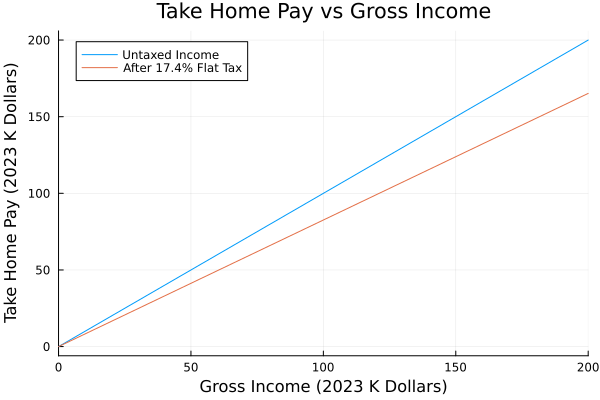

In [11]:
p = plotthinc();
p = plot!(x -> x * (1.0 - 0.174); label="After 17.4% Flat Tax")

As we can see in the above graph, after taking out taxes at an equal percentage for each person everyone's income is lower, including people who already had very low income on the left side of our graph. This isn't what our tax code today actually does. Later we'll use IRS data to approximate what our tax code actually does, but let's take a next step. Let's create a UBI which is about 10% of GDP/capita. [Today's GDP](https://fred.stlouisfed.org/series/A939RC0Q052SBEA) is about $82,000 per person per year, so we will be paying $8300 per person per year in UBI, and we will need to take about 10% more in tax. 

Of course the amount of income a household will receive varies with the number of people in the household, let's plot for 1, 2, and 4 person households:


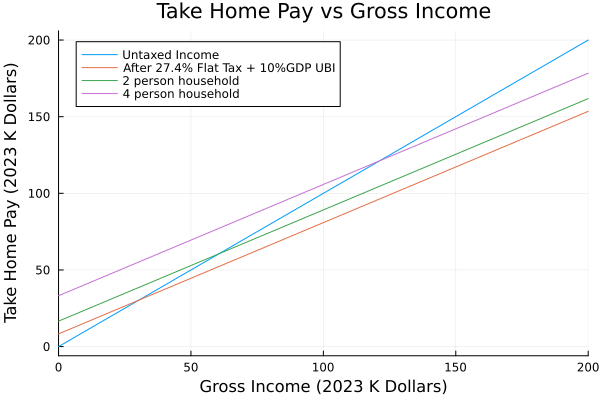

In [15]:
p = plotthinc();

p = plot!(x -> x*(1.0 - 0.174 - 0.1) + 8.3; label = "After 27.4% Flat Tax + 10%GDP UBI")
p = plot!(x -> x*(1.0 - 0.174 - 0.1) + 8.3*2; label = "2 person household")
p = plot!(x -> x*(1.0 - 0.174 - 0.1) + 8.3*4; label = "4 person household")


And now, really we should be done. A single person household doesn't pay a dime in net taxes until they make more than $30k or so, a couple doesn't pay a dime in taxes until they make about $60k, and a family of 4 doesn't pay a dime until they make $120k. Not only that but the government gets the same net revenue to spend on its programs as it does today. Furthermore the 1040 tax form can consist of a couple of lines, and human resources and payroll departments can withhold by doing a single multiplication by 0.274 and the accuracy will be perfect, with no possibility of penalties for under withholding and entire complicated websites for calculating W4 forms and difficulty for people like professional musicians who get 18 W2 forms per year, or small business owners who have highly variable income from month to month or year to year.

Of course, you might ask, couldn't we help the poor even a little more, perhaps by making the take home income curve up a little according to a more "progressive" tax. It should be noted that the effective tax rate is already very progressive in the above scheme. For example, here is the tax paid (negative = net dollars received) as a fraction of Gross Income for a family of 4:

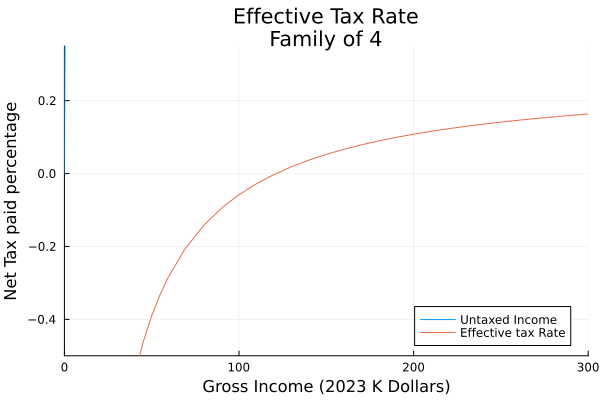

In [23]:
p = plotthinc();
p = plot!(x -> (x - ((x *(1.0 - .274) + 8.3*4)))/x; ylab="Net Tax paid percentage",ylim=(-.5,.35), title="Effective Tax Rate\nFamily of 4",
    label="Effective tax Rate",xlim=(0,300))


As we can see in the above graph, a family of 4 making $50k would be *receiving net* a total of about 40% additional income, whereas a family of 4 making $200k would be paying net about 10% in taxes.

How is this possible? Isn't this too good to be true? Well, let's look into the distribution of incomes in the US, according to the [Tax Policy Center](https://www.taxpolicycenter.org/statistics/household-income-quintiles) together with the number of households total [as reported by the Census](https://www.census.gov/quickfacts/fact/table/US/HSD410222) (125736353 households)

![IncomeQuintiles](imgs/IncomeQuintilesScreenshot.png)

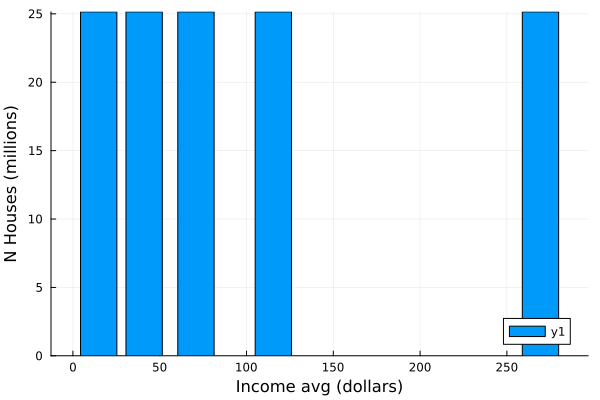

In [30]:
const nhous = 125736353.0
incomequin = DataFrame(meaninc=map(Float64,[14859,41025,70879,115462,269356]),n=[.2,.2,.2,.2,.2])
incomequin.houses = incomequin.n*nhous

@df incomequin bar(:meaninc ./ 1000,:houses ./ 1e6, xlab="Income avg (dollars)",ylab="N Houses (millions)")


As we can see there are 25 Million households who are in the top 20% of income, and their average income is about $270k. The total contribution to revenue for each household income block is given as:

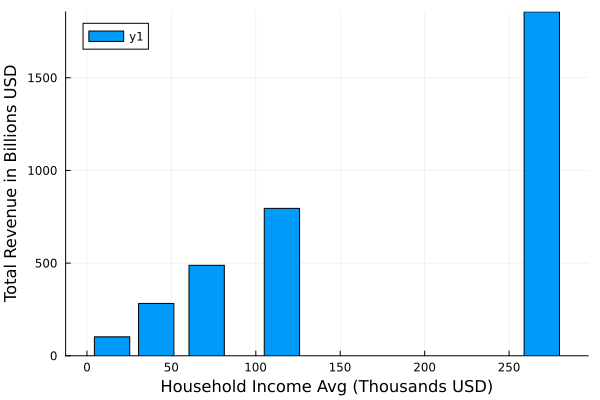

In [38]:
bar(incomequin.meaninc ./ 1000, 0.274 .* incomequin.meaninc * nhous * 0.2/1e9; ylab="Total Revenue in Billions USD",xlab="Household Income Avg (Thousands USD)")

We can calculate the total revenue, subtract the total UBI, and compare to the current govt revenue:

In [48]:
totrev = sum(0.274 .* incomequin.meaninc * nhous * 0.2/1e12)

3.524973240384297

There's clearly something wrong with our calculations, we've assumed that household income is too big of a fraction of GDP, we're also being too approximate in our calculation. Here's the breakdown shown at the [Wikipedia summary of federal revenue](https://en.wikipedia.org/wiki/United_States_federal_budget#/media/File:2022_US_Federal_Revenues.png) [Wikipedia summary of the federal outlays](https://en.wikipedia.org/wiki/United_States_federal_budget#/media/File:2022_US_Federal_Mandatory_Outlays.png)

We simplify and make the tax code more fair by combining individual income and payroll taxes into a single income tax system. So we need to replace this revenue:

Revenue For Replacement:

1) Individual Income Taxes = $2.632 Trillion
2) Payroll Taxes = $1.484 Trillion

Total Revenue: $4.116 Trillion


We can think of UBI as a little like "extending social security to everyone" which means that some of the money currently going to social security could be thought of as UBI we're already collecting and paying. We'll assume there's some additional amounts on top of the UBI needed for social security payments to the elderly above and beyond the UBI but half of the current social security outlays can be "converted to UBI". In addition, "income security" and "student loan programs" are also transfers to groups that will now be getting UBI instead, they can be simply converted in place.

Outlays of Interest:

1) Social Security = $1.213 Trillion
2) Income Security = $0.581 Trillion
3) Student Loan Programs = $0.482 Trillion

Total Outlays scheduled for partial replacement: $2.276 Trillion

Total UBI to pay: $2.789 Trillion

Additional revenue needed for UBI after conversion: 2.789 - .581 - .482 - 1.213/2 = 1.120 Trillion

So our new revenue stream must be $4.116 Trillion + 1.12 Trillion new revenue for UBI = **5.24 Trillion** required from our taxes

Let's figure out our total household income, and solve for the percentage we need

In [54]:
revreqd = 4.116+1.12
tothhinc = sum(incomequin.meaninc * nhous * 0.2/1e12)
@printf("We need to use flat tax rate of: %.2f %%\n",revreqd/tothhinc*100)

We need to use flat tax rate of: 40.70 %


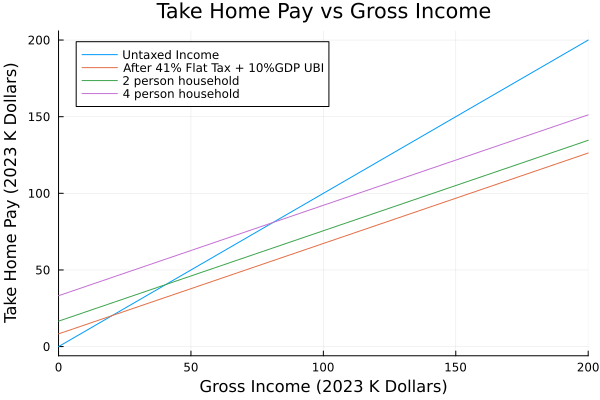

In [57]:
p = plotthinc();
flatrate = .41 # round off
p = plot!(x -> x*(1.0 - flatrate) + 8.3; label = @sprintf("After %.0f%% Flat Tax + 10%%GDP UBI",flatrate*100))
p = plot!(x -> x*(1.0 - flatrate) + 8.3*2; label = "2 person household")
p = plot!(x -> x*(1.0 - flatrate) + 8.3*4; label = "4 person household")
